<a href="https://colab.research.google.com/github/tigerjk726/Bumjoong/blob/main/machine_learning_application_freguency(added_month).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')             

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon

/content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon


In [3]:
import pandas as pd
df = pd.read_csv('summary2.csv')
df

,DATE,MON,AAO,AMO,AO,EMI,GMT,NINO3,NINO4,PDO,PNA,QBO,FREG,INTEN
0,198001,1,2468.847,-0.251,-13914.348,0.468,-0.008,0.362,0.318,0.688,-0.787,-1.147,0,0.0
1,198002,2,5287.235,-0.265,-7920.162,0.573,0.048,0.025,0.311,1.233,1.002,3.094,0,0.0
2,198003,3,18067.714,-0.343,-9798.327,0.417,0.005,-0.153,0.166,1.107,-0.539,5.553,0,0.0
3,198004,4,23780.651,-0.064,-4271.158,0.394,0.035,-0.189,0.107,1.255,1.457,11.231,0,0.0
4,198005,5,3995.642,0.046,-8602.326,0.369,0.072,-0.155,0.201,1.204,0.377,18.477,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,202008,8,8954.542,0.263,-1599.950,-0.229,0.320,-0.558,-0.237,-1.413,-0.156,20.514,2,67.5
488,202009,9,4960.132,0.135,4138.498,-0.207,0.435,-0.918,-0.463,-1.137,0.402,20.357,2,90.0
489,202010,10,-10689.321,0.129,662.580,-0.377,0.416,-1.043,-0.695,-0.612,-0.943,19.270,0,0.0
490,202011,11,-13940.175,0.026,16778.709,-0.441,0.519,-1.136,-0.792,-1.451,-0.402,18.811,0,0.0


In [4]:
df.columns

Index(['DATE', 'MON', 'AAO', 'AMO', 'AO', 'EMI', 'GMT', 'NINO3', 'NINO4',
       'PDO', 'PNA', 'QBO', 'FREG', 'INTEN'],
      dtype='object')

In [5]:
X = df.drop(columns = ['DATE','FREG','INTEN']) # "X"라는 변수에 날짜, 횟수와 강도를 제외하고 지정
y = df['FREG']
y2 = df['INTEN']
X

,MON,AAO,AMO,AO,EMI,GMT,NINO3,NINO4,PDO,PNA,QBO
0,1,2468.847,-0.251,-13914.348,0.468,-0.008,0.362,0.318,0.688,-0.787,-1.147
1,2,5287.235,-0.265,-7920.162,0.573,0.048,0.025,0.311,1.233,1.002,3.094
2,3,18067.714,-0.343,-9798.327,0.417,0.005,-0.153,0.166,1.107,-0.539,5.553
3,4,23780.651,-0.064,-4271.158,0.394,0.035,-0.189,0.107,1.255,1.457,11.231
4,5,3995.642,0.046,-8602.326,0.369,0.072,-0.155,0.201,1.204,0.377,18.477
...,...,...,...,...,...,...,...,...,...,...,...
487,8,8954.542,0.263,-1599.950,-0.229,0.320,-0.558,-0.237,-1.413,-0.156,20.514
488,9,4960.132,0.135,4138.498,-0.207,0.435,-0.918,-0.463,-1.137,0.402,20.357
489,10,-10689.321,0.129,662.580,-0.377,0.416,-1.043,-0.695,-0.612,-0.943,19.270
490,11,-13940.175,0.026,16778.709,-0.441,0.519,-1.136,-0.792,-1.451,-0.402,18.811


machine learning application

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

#Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mylist = []
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(y_test, y_pred)

mylist.append(acc_logreg)
print(cm)
print(acc_logreg,'%')

[[82  0  0]
 [15  1  0]
 [ 1  0  0]]
0.8383838383838383 %


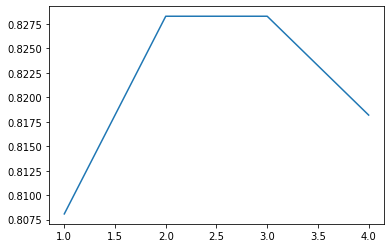

In [10]:
# KNN
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []
for neighbors in range(1,5):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(1,5)), list1)
plt.show()

In [11]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_knn = accuracy_score(y_test, y_pred)
mylist.append(acc_knn)
print(cm)
print(acc_knn,'%')

[[76  6  0]
 [10  6  0]
 [ 1  0  0]]
0.8282828282828283 %


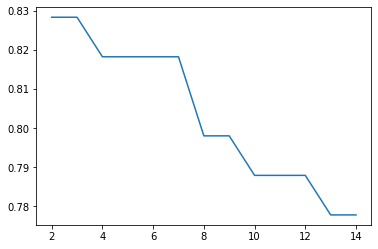

In [12]:
# DecisionTreeClassifier


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,15):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,15)), list1)
plt.show()

In [13]:
classifier = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_decisiontree = accuracy_score(y_test, y_pred)
print(cm)
print(acc_decisiontree, '%')
mylist.append(acc_decisiontree)

[[81  0  1]
 [16  0  0]
 [ 1  0  0]]
0.8181818181818182 %


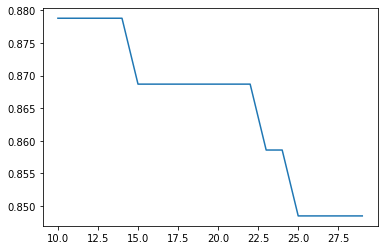

In [14]:
# RANDOM FOREST CLASSIFCATION
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_randomforest = accuracy_score(y_test, y_pred)
mylist.append(acc_randomforest)
print(cm)
print(acc_randomforest,'%')

[[82  0  0]
 [12  4  0]
 [ 1  0  0]]
0.8686868686868687 %


In [16]:
# ANN (neural network )
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )

ann.fit(x_train, y_train, batch_size = 16, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6230 - accuracy: 0.7863
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5799 - accuracy: 0.8244
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.8295
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.8295
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.8295
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4973 - accuracy: 0.8295
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4812 - accuracy: 0.8295
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.8295
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4554 - accuracy: 0.8295
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.8295
Epoch 11/

In [17]:
import numpy as np
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.9)
np.set_printoptions()

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print()

# accuracy
ac_ann = accuracy_score(y_test,y_pred)
print("Accuracy")
print(ac_ann)
mylist.append(ac_ann)

4/4 [==============================] - 0s 3ms/step
Confusion Matrix
[[75  7  0]
 [ 8  8  0]
 [ 0  1  0]]

Accuracy
0.8383838383838383


In [18]:
# DNN
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, Input

i = Input(shape=(None, 455, 11))

x = Dense(16, activation='relu')(i)
x = Dropout(0.5)(x)

x = Dense(32, activation='relu')(i)
x = Dropout(0.5)(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)

y = Dense(1, activation='sigmoid')(x)

dnn_adam = Model(inputs=i, outputs=y)

dnn_adam.compile(optimizer='adam', 
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

dnn_adam.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 455, 11)]   0         
                                                                 
 dense_6 (Dense)             (None, None, 455, 32)     384       
                                                                 
 dropout_1 (Dropout)         (None, None, 455, 32)     0         
                                                                 
 dense_7 (Dense)             (None, None, 455, 64)     2112      
                                                                 
 dropout_2 (Dropout)         (None, None, 455, 64)     0         
                                                                 
 dense_8 (Dense)             (None, None, 455, 32)     2080      
                                                                 
 dropout_3 (Dropout)         (None, None, 455, 32)     0     

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

history_adam = dnn_adam.fit(x=x_train, y=y_train,
                             validation_data=(x_test, y_test),
                             epochs=300,
                             callbacks=[early_stopping])

Epoch 1/300


12/13 [==========================>...] - ETA: 0s - loss: 0.7918 - accuracy: 0.4557 

13/13 [==============================] - 2s 38ms/step - loss: 0.7885 - accuracy: 0.4555 - val_loss: 0.6293 - val_accuracy: 0.7778
Epoch 2/300
13/13 [==============================] - 0s 5ms/step - loss: 0.6878 - accuracy: 0.5471 - val_loss: 0.5694 - val_accuracy: 0.8283
Epoch 3/300
13/13 [==============================] - 0s 6ms/step - loss: 0.6748 - accuracy: 0.6285 - val_loss: 0.5386 - val_accuracy: 0.8283
Epoch 4/300
13/13 [==============================] - 0s 6ms/step - loss: 0.5913 - accuracy: 0.7125 - val_loss: 0.5224 - val_accuracy: 0.8283
Epoch 5/300
13/13 [==============================] - 0s 5ms/step - loss: 0.5794 - accuracy: 0.7430 - val_loss: 0.4984 - val_accuracy: 0.8283
Epoch 6/300
13/13 [==============================] - 0s 5ms/step - loss: 0.5799 - accuracy: 0.7735 - val_loss: 0.4854 - val_accuracy: 0.8283
Epoch 7/300
13/13 [==============================] - 0s 6ms/step - loss: 0.6183 - accuracy: 0.7710 - val_loss: 0.4879 - val_accuracy: 0.8283
Epoch 8/300
13/13 [=====

In [20]:
import numpy as np
y_pred = dnn_adam.predict(x_test)
y_pred = (y_pred > 0.9)
np.set_printoptions()

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print()

# accuracy
ac_dnn = accuracy_score(y_test,y_pred)
print("Accuracy")
print(ac_dnn)
mylist.append(ac_dnn)

4/4 [==============================] - 0s 5ms/step
Confusion Matrix
[[82  0  0]
 [16  0  0]
 [ 1  0  0]]

Accuracy
0.8282828282828283


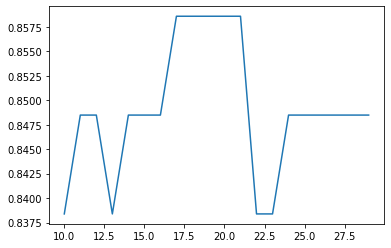

In [21]:
# xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30,1)), list1)
plt.show()

In [22]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 15, max_depth=12, subsample=0.7)
classifier.fit(x_train,y_train)

XGBClassifier(max_depth=12, n_estimators=15, objective='multi:softprob',
              subsample=0.7)

In [23]:
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac_xgboost = accuracy_score(y_test, y_pred)
mylist.append(ac_xgboost)
print(cm)
print(ac_xgboost)

[[80  1  1]
 [12  4  0]
 [ 1  0  0]]
0.8484848484848485


In [24]:
# catboost
!pip install catboost

from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(x_train, y_train)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.1 MB/s 
Learning rate set to 0.075446
0:	learn: 1.6731686	total: 63.5ms	remaining: 1m 3s
1:	learn: 1.5453059	total: 75.6ms	remaining: 37.7s
2:	learn: 1.4393509	total: 88ms	remaining: 29.3s
3:	learn: 1.3508752	total: 100ms	remaining: 25s
4:	learn: 1.2715256	total: 113ms	remaining: 22.4s
5:	learn: 1.2097633	total: 125ms	remaining: 20.6s
6:	learn: 1.1485912	total: 137ms	remaining: 19.4s
7:	learn: 1.0929066	total: 148ms	remaining: 18.4s
8:	learn: 1.0296206	total: 161ms	remaining: 17.7s
9:	learn: 0.9812620	total: 173ms	remaining: 17.2s
10:	learn: 0.9355499	total: 186ms	remaining: 16.7s
11:	learn: 0.9011408	total: 198ms	remaining: 16.3s
12:	learn: 0.8687921	total: 210ms	remaining: 16s
13:	learn: 0.8389523	total: 226ms	remaining: 15.9s
14:	learn: 0.8090111	total: 239ms	remaining: 15.7s
15:	learn: 0.7821321	total: 255ms	remaining: 15.7s
16:	learn:

In [25]:
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac_catboost = accuracy_score(y_test, y_pred)
mylist.append(ac_catboost)
print(cm)
print(ac_catboost)

[[80  2  0]
 [11  5  0]
 [ 1  0  0]]
0.8585858585858586


In [26]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'ANN', 'DNN',  
              'Decision Tree','xgboost','catboost'],
    'Score': [acc_knn, acc_logreg, 
              acc_randomforest, ac_ann, ac_dnn, acc_decisiontree,ac_xgboost,ac_catboost
              ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,0.868687
7,catboost,0.858586
6,xgboost,0.848485
1,Logistic Regression,0.838384
3,ANN,0.838384
0,KNN,0.828283
4,DNN,0.828283
5,Decision Tree,0.818182


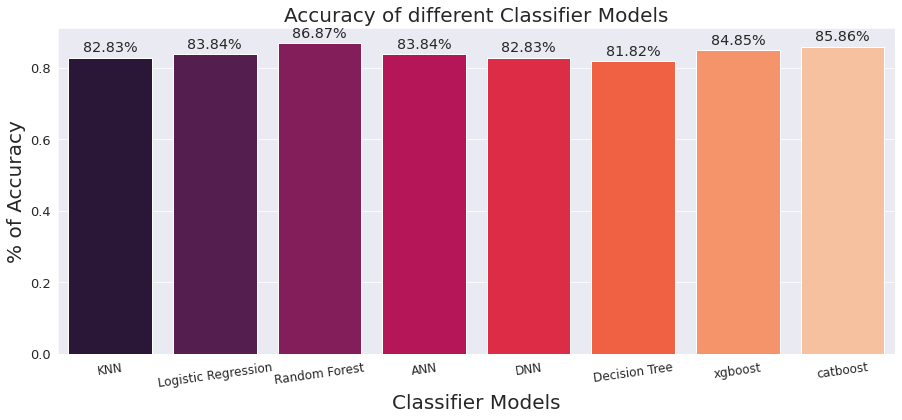

In [27]:
import seaborn as sns 
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

XGBoost는 의사결정나무로 하며 Gradient를 이용하여 과적합 방지를 위한 기법이 추가된 알고리즘

CatBoost는 대부분이 범주형변수로 이루어진 데이터셋에서 예측 성능이 우수한 장점, 약한 분류기들을 결합하여 보다 더 강한 분류기를 만드는 알고리즘
https://hyewon328.tistory.com/m/entry/CatBoost-CatBoost-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4

https://statinknu.tistory.com/m/33

https://blog.naver.com/PostView.nhn?blogId=winddori2002&logNo=221931868686&categoryNo=17&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView
